# Transaction cost analysis

Investors should not ignore the impact of STT (Securities Transaction Tax) on investment strategies. As inflation rates come down, notional rates of returns are going to compress. However, STT remains at 0.1% of notional *traded* value. So, if an investment strategy maintains the same turnover as before, after-tax profits would shrink further.

Annualized [inflation adjusted returns](https://github.com/stockviz/plutons/blob/master/inflation-adjusted-returns.R.ipynb) of NIFTY 50 over different 10-year periods are, on average, is 6-6.5%. If you assume an inflation rate between 4-6%, 10-year notional return expectations should be around 10-12%.

Here's one way to think through the impact of portfolio turnover on returns.

In [7]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=99999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(ggrepel)
library(reshape2)

library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

In [8]:
numPeriods <- 10 #years
totalChurn <- seq(from=0.0, to=0.90, by=0.15)
churn <- t(matrix(rep(totalChurn, numPeriods), ncol=numPeriods)) # if fund turnover is x, then churn is 2x. 
# Portfolio turnover is calculated by dividing either the total purchases or total sales, whichever is lower, by the average of the net assets. https://svz.bz/2mnc5UV 
cost <- rep(0.1, numPeriods) # STT
dates <- seq(from=as.Date("2000-01-01"), by="year", length.out=numPeriods + 1)

In [9]:
doScenarioAnalysis <- function(annualReturn){
    returns <- rep(annualReturn, numPeriods)
    scenario <- apply(churn, 2, function(ch) cumprod(1 + returns - cost*ch))
    scenario <- rbind(rep(1, ncol(churn)), scenario)
                      
    scenDf <- data.frame(scenario)
    names(scenDf) <- sapply(totalChurn, function(x) sprintf("x %.2f", x*100))
    scenDf$T <- seq(1, by=1, length.out=nrow(scenario))
    toPlot <- melt(scenDf, id='T')
                            
    ggplot(toPlot, aes(x = T, y = value, color = variable)) + 
        theme_economist() +
        geom_line() + 
        geom_text_repel(data=subset(toPlot, T == max(T)), aes(label=round(value,2)), show.legend = F) +
        geom_hline(yintercept = 1, col='grey') +
        labs(x='', y='growth of Rs. 1', fill='', color='churn(%)',
             title="Transaction cost analysis", 
             subtitle=sprintf("notional returns: %.2f%%", annualReturn*100)) +
        annotate("text", x=numPeriods, y=min(scenario, na.rm=T), label = "@StockViz", 
                 hjust=0, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)
}

### If gross returns are zero

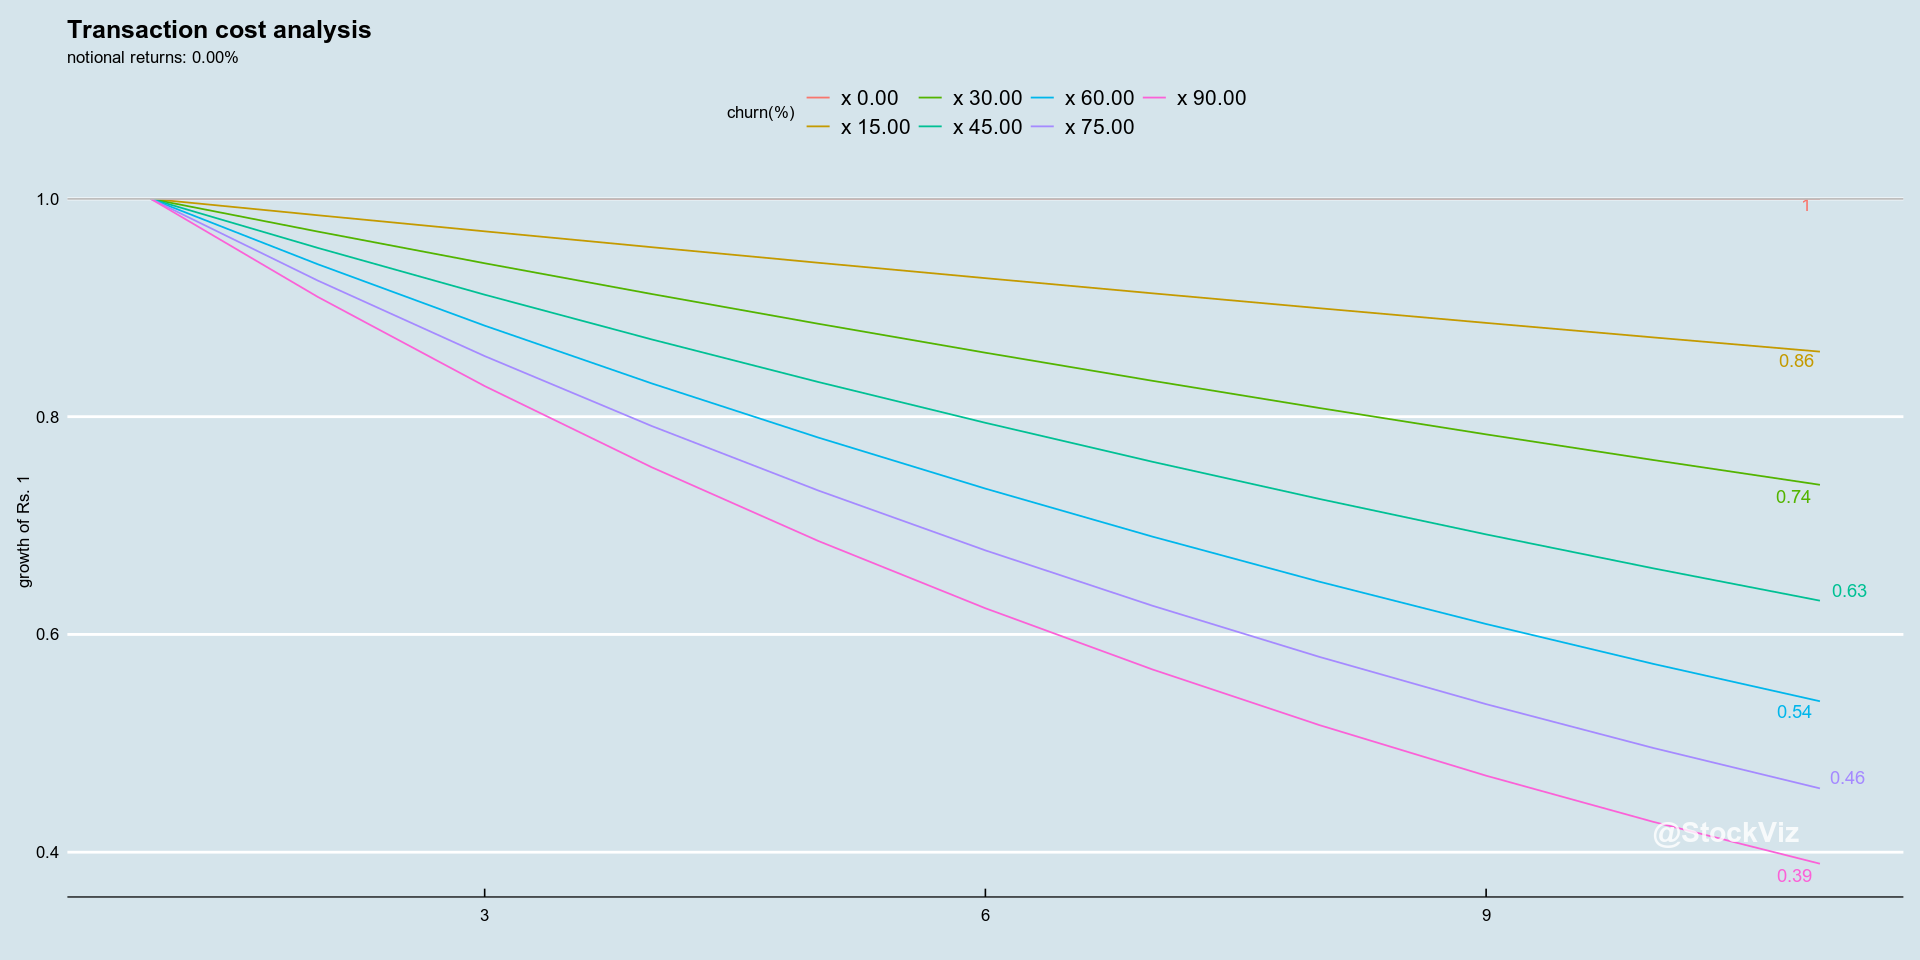

In [10]:
doScenarioAnalysis(0) 

### If gross returns are 10%

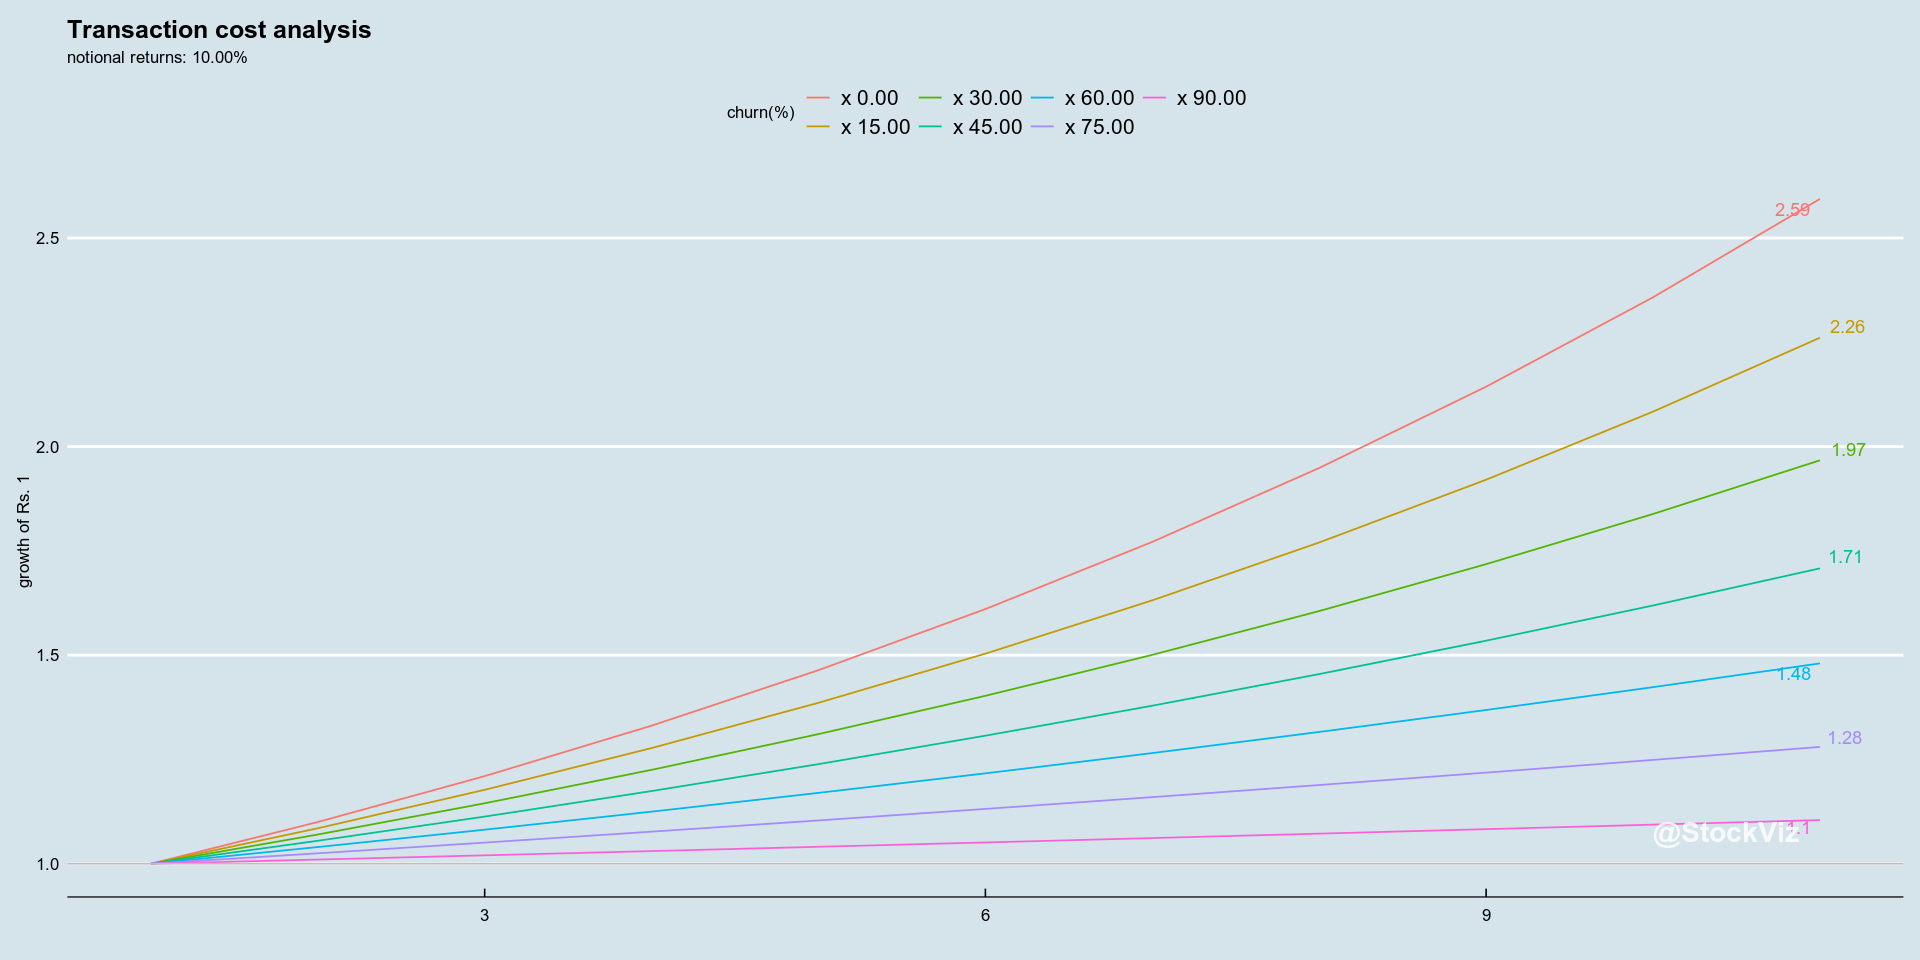

In [11]:
doScenarioAnalysis(0.1)

Purely because of the churn, instead of Rs. 1 growing to Rs. 2.59 in 10 years, it would have only grown to Rs. 1.28. The government pockets the difference.

Higher gross returns doesn't make the problem go away.

### If gross returns are 12%

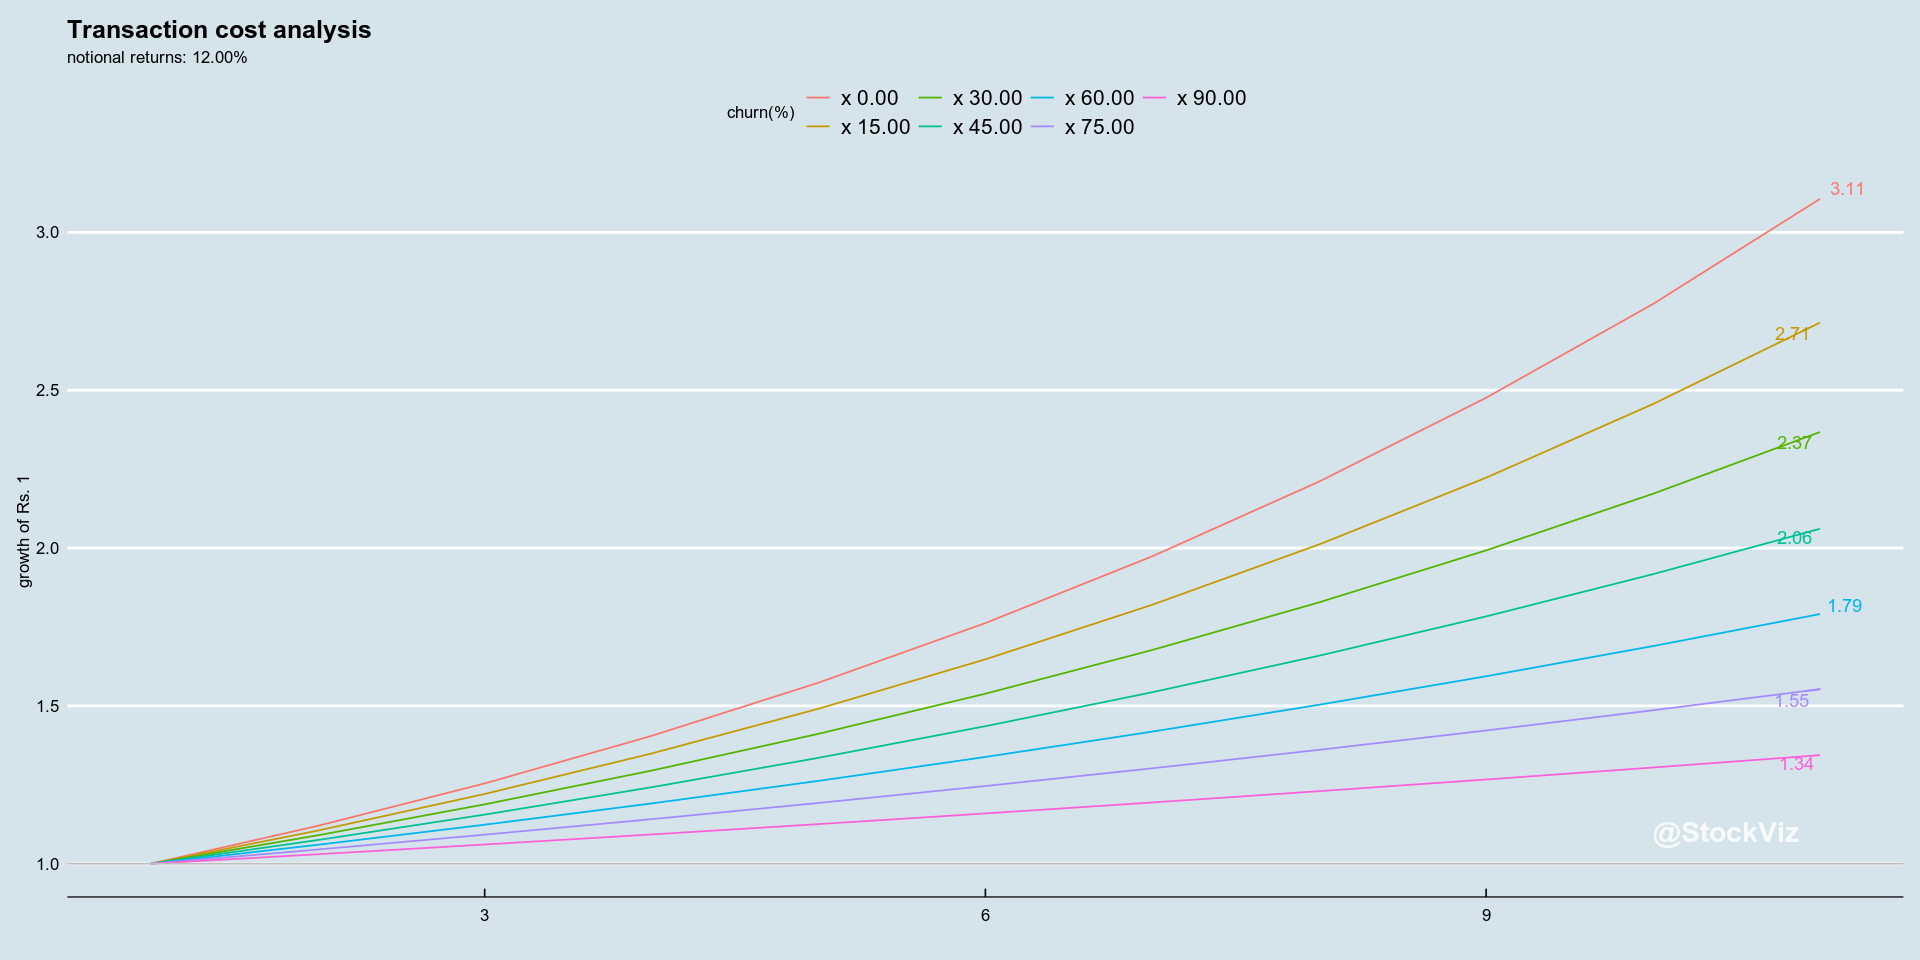

In [12]:
doScenarioAnalysis(0.12)

The final scenario shows that increasing notional returns, in itself, is not going to have a big impact on the after cost returns of the portfolio. The turnover has to be reduced as well.

This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!